Lets take a simple random variable data and compute a PCA on them.
In this code we try to convert 3D space into 2D by using PCA where information of 3D space is preserved as much as possible in 2D space

Importing some useful libraries 

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

First we create a random data set of 3D space and try to plot on 3D graph so we can visualize how our data look like

In [3]:
x = [2,3,5,5,7,7,8,9]
y = [2,5,4,6,6,8,99,9]
z = [2,4,4,5,5,8,7,8]
# we have 3 columns and 8 row so this can be represent in matrices as
original_data = np.matrix([x,y,z]).T
df = pd.DataFrame(original_data,columns=['First','Second','Third'])
df

,First,Second,Third
0,2,2,2
1,3,5,4
2,5,4,4
3,5,6,5
4,7,6,5
5,7,8,8
6,8,99,7
7,9,9,8


<IPython.core.display.Javascript object>


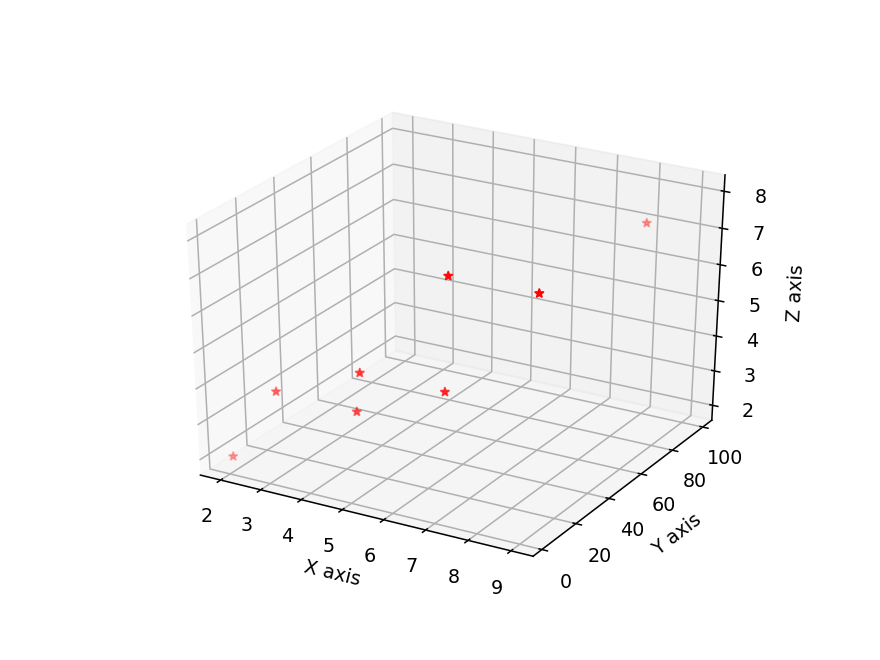

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x,y,z,color = 'red', marker ='*')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Now we try to reduce the dimention of this 3D space to 2D space. How? by using Principal component analysis ( PCA )

## Steps of PCA
1. Normalize the data
2. Find Covarience matrix of normalized data
3. Compute eign values and eign vectors of covarience matrics
4. Identify the Principal Component (Axis which capture most of the variation)
5. Choosing components and forming a feature vector


## 1. Normalize the data
we know that our data is lies between 2 to 10 integer number but we need to convert this data into standard normalization form or standard distribution so that is mean is 'zero' with 'one' standard deviation.

Why we need to convert our data into standard distribution??

because PCA calculates a new projection of our data set. And the new axis are based on the standard deviation of our variables. So a variable with a high standard deviation will have a higher weight for the calculation of axis than a variable with a low standard deviation. If we normalize our data, all variables have the same standard deviation, thus all variables have the same weight and our PCA calculates relevant axis.

here axis is a Principal component which capture most of the variation

But in our data set we dont need normalize because all variables have same unit and lies between 2 - 10

$$\begin{array}{l}{z=\frac{x-\mu}{\sigma}} \\ {\mu=\text { Mean }} \\ {\sigma=\text { Standard Deviation }}\end{array}$$

we can calculate Z-Score value of each variable by using above formula
where,
x = each variable
mue = mean of each column
sigma = standard deviation of each column


In [7]:
normalize_data = np.array(np.empty(list(original_data.shape)))
for i in range(original_data.shape[1]):
    normalize_data[:,i] = ((original_data[:,i] - np.mean(original_data[:,i])).reshape(original_data.shape[0])) 
    normalize_data[:,i] /= np.std(original_data[:,i])
normalize_data


array([[-1.6464639 , -0.4972671 , -1.69080559],
       [-1.20740686, -0.40023937, -0.68884672],
       [-0.32929278, -0.43258195, -0.68884672],
       [-0.32929278, -0.3678968 , -0.18786729],
       [ 0.5488213 , -0.3678968 , -0.18786729],
       [ 0.5488213 , -0.30321165,  1.31507101],
       [ 0.98787834,  2.63996274,  0.81409158],
       [ 1.42693538, -0.27086907,  1.31507101]])

<IPython.core.display.Javascript object>


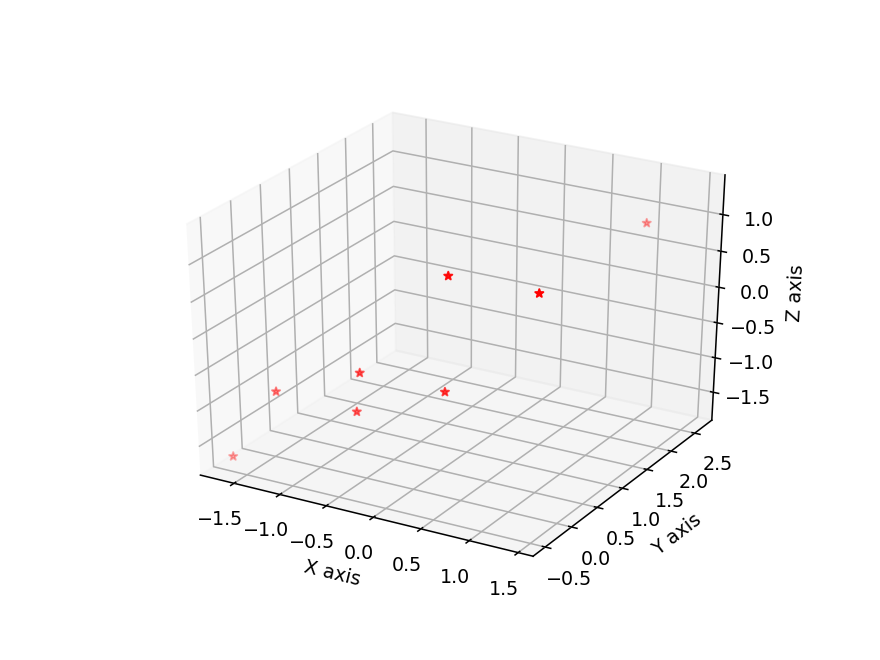

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(normalize_data[:,0],normalize_data[:,1],normalize_data[:,2],color = ['red'], marker ='*')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

This graph is similar to the graph of original data

### 2. Covarience matrix of normalized data 

In [9]:
covarience = np.cov(normalize_data , rowvar=False)  # rowvar set to false so it take covarience column wise
covarience

array([[1.14285714, 0.48838667, 1.02909177],
       [0.48838667, 1.14285714, 0.42098776],
       [1.02909177, 0.42098776, 1.14285714]])

if any diagonal value is tends to zero which means that that columns is getting by the combinations of other columns. In simple words that column space is lie in either first or second column space

### 3. Compute Eign value and Eign vectors 

In [10]:
eign_val , eign_vct = np.linalg.eig(covarience)
print("Eign values : \n ",eign_val)
print("Eign vectors : \n",eign_vct)

Eign values : 
  [2.48113541 0.11103279 0.83640323]
Eign vectors : 
 [[-0.64341034 -0.71846191  0.26426429]
 [-0.43332342  0.05723388 -0.89941931]
 [-0.63107365  0.69320759  0.34815124]]


These three eign vectors are perpendicular to each other or these are orthogonal vectors i.e we can make a full 3D space by using the linear combination of these 3 vectors. Therefore we can calculate eign vectors to find only those values which are perpendicular to each other and use to form 3D space.

## 4. Finding Principal Component

Principal component is a axis which contains the projection of eign vectors on it

In [11]:
# sorting eignvectors as well as eign values
sort_index = eign_val.argsort()[::-1]
sorted_eign_val = eign_val[sort_index]
sorted_eign_vct = eign_vct[:,sort_index]
print("sorted_eign_val : \n",sorted_eign_val)
print("sorted_eign_vct : \n",sorted_eign_vct)

sorted_eign_val : 
 [2.48113541 0.83640323 0.11103279]
sorted_eign_vct : 
 [[-0.64341034  0.26426429 -0.71846191]
 [-0.43332342 -0.89941931  0.05723388]
 [-0.63107365  0.34815124  0.69320759]]


#### Now we find which principal axis is useful to capture most varied data
lets check which eign value is greater


In [12]:
eign_val_1D_space = eign_val[sort_index[0]]
eign_vct_1D_space = eign_vct[:,sort_index[0]]
(sorted_eign_val[0]/(sorted_eign_val.sum()))*100

72.36644947510042

what is this value?? this value shows us that if we try to plot our whole data in 1D space then we cover 72% of data i.e
only 18% of data accuracy is lost

In [13]:
eign_val_2D_space = eign_val[sort_index[0:2]]
eign_vct_2D_space = eign_vct[:,sort_index[0:2]]
((sorted_eign_val[0]+sorted_eign_val[1])/(sorted_eign_val.sum()))*100

96.7615436582483

If we try to put data in 2D space then accuracy is 97 %

## 5. Choosing component and forming vector

Time to convert our original data into new 2D space and 1D space data so we can plot them and visualize the data

In [14]:
eign_vct_2D_space[:,1] = -eign_vct_2D_space[:,1]
forming_vector_2D = normalize_data.dot(eign_vct_2D_space)

In [15]:
reduced_data_2D = pd.DataFrame(forming_vector_2D,columns = ['Principal Component 1','Principal Component 2'])
print(reduced_data_2D)

   Principal Component 1  Principal Component 2
0               2.341852               0.576506
1               1.385004               0.198914
2               0.834031              -0.062229
3               0.489847              -0.178467
4              -0.075141              -0.410521
5              -1.051635              -0.875592
6              -2.293321               1.829946
7              -1.630638              -1.078557


<IPython.core.display.Javascript object>


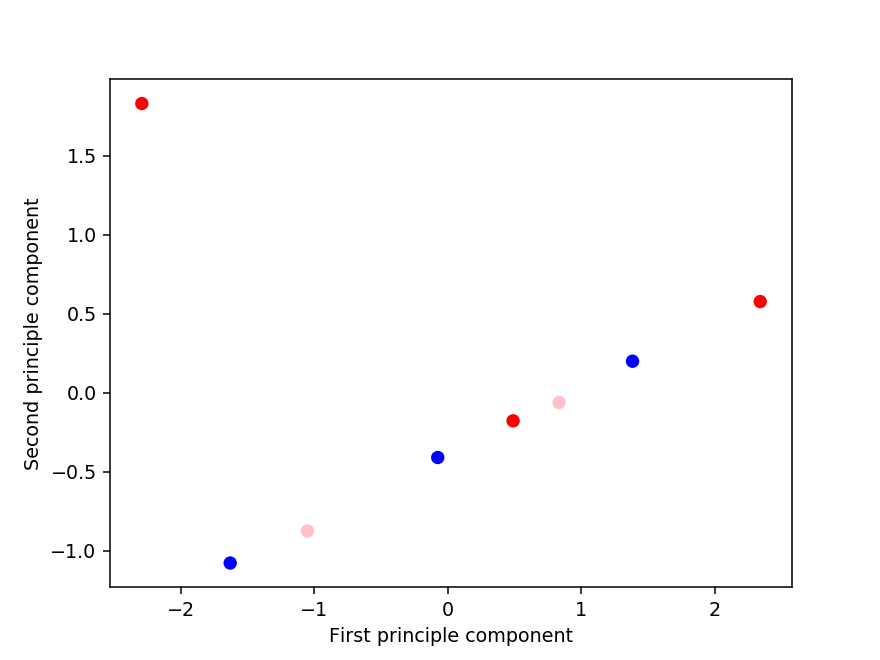

In [16]:
plt.scatter(forming_vector_2D[:,0],forming_vector_2D[:,1],c=['red','blue','pink'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.show()

# BOOM!!! BONUS

In [17]:
from sklearn.preprocessing import StandardScaler

original_data_2 = original_data.copy()
scaler = StandardScaler()
scaler.fit(original_data_2) # it calculate mean and standard deviation

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
normalize_data_2 = scaler.fit_transform(original_data_2)
normalize_data_2

array([[-1.6464639 , -0.4972671 , -1.69080559],
       [-1.20740686, -0.40023937, -0.68884672],
       [-0.32929278, -0.43258195, -0.68884672],
       [-0.32929278, -0.3678968 , -0.18786729],
       [ 0.5488213 , -0.3678968 , -0.18786729],
       [ 0.5488213 , -0.30321165,  1.31507101],
       [ 0.98787834,  2.63996274,  0.81409158],
       [ 1.42693538, -0.27086907,  1.31507101]])

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(normalize_data_2)
reduced_data_2D_2 = pca.transform(normalize_data_2)
reduced_data_2D_2


array([[ 2.34185223,  0.57650605],
       [ 1.38500417,  0.19891434],
       [ 0.83403128, -0.0622294 ],
       [ 0.48984677, -0.17846693],
       [-0.07514091, -0.41052113],
       [-1.05163525, -0.87559189],
       [-2.29332056,  1.82994551],
       [-1.63063773, -1.07855655]])

<IPython.core.display.Javascript object>


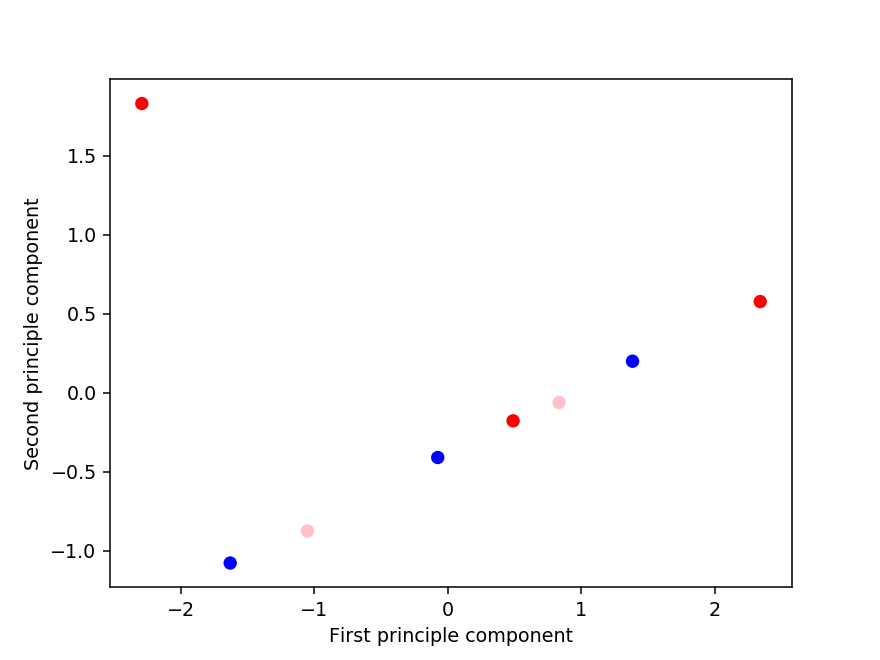

Text(0,0.5,'Second principle component')

In [20]:
plt.scatter(reduced_data_2D_2[:,0],reduced_data_2D_2[:,1],c=['red','blue','pink'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [21]:
pca.components_ # return eign vectors of PCA

array([[-0.64341034, -0.43332342, -0.63107365],
       [-0.26426429,  0.89941931, -0.34815124]])